Importing all necessary files

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

Loading dataset to a Pandas DataFrame

In [120]:
data = pd.read_csv("loan_approval_dataset.csv")

Getting to know the structure of the dataset

In [121]:
data.shape

(4269, 13)

In [122]:
data.sample(5)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4164,4165,1,Graduate,Yes,6400000,16400000,20,555,6000000,2500000,20100000,7400000,Approved
2132,2133,0,Graduate,Yes,5900000,15200000,16,399,15200000,3200000,12200000,6500000,Rejected
564,565,5,Graduate,No,2000000,6100000,2,407,1900000,1900000,4600000,2000000,Approved
570,571,1,Graduate,No,2300000,7200000,8,453,3000000,2100000,8100000,3400000,Rejected
2452,2453,3,Not Graduate,Yes,7500000,21600000,14,678,8800000,12100000,20100000,11200000,Approved


In [123]:
data.duplicated().sum()

np.int64(0)

Check the dataset for missing values (NaN) :

In [124]:
data.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [126]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

As you can see, each feature name is preceded by a space. Be careful about using their names!

The 'loan_id' has no effect on its approval or disapproval :

In [127]:
data.drop(['loan_id'], axis=1, inplace=True)

Check target class balancy

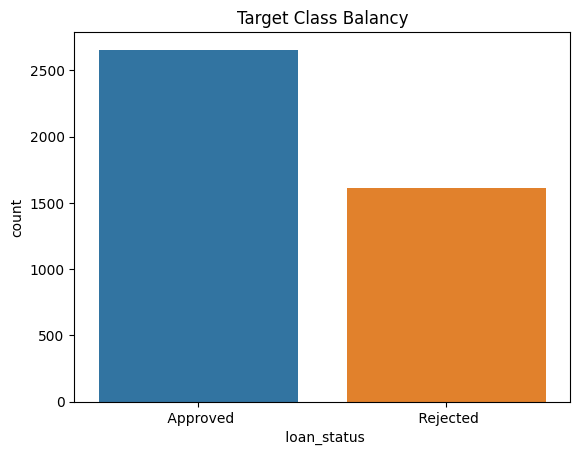

In [128]:
sns.countplot(data, x=' loan_status', hue=' loan_status')
plt.title('Target Class Balancy')

plt.show()

Result : As you can see, Approved loans are more than 2,500. While the number of rejected loans are around 1,500.

To train the model better, it is necessary to balance the number of our target classes.
To prevent data leakage, it is necessary to perform balancing after splitting the data into training and testing.

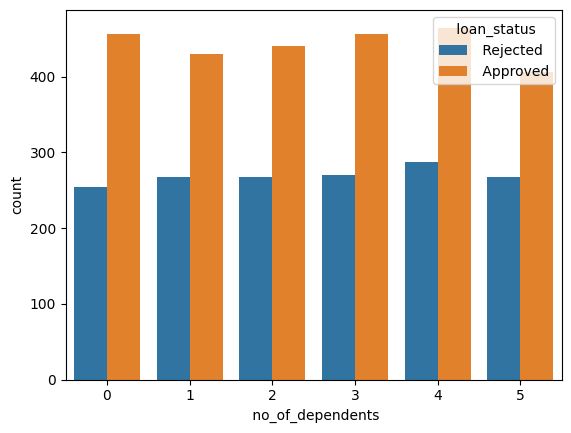

In [129]:
sns.countplot(data=data, x=' no_of_dependents', hue=' loan_status')

plt.show()

Result : It can be said with high confidence that the number of dependents does not affect the rejection or acceptance of a loan request.

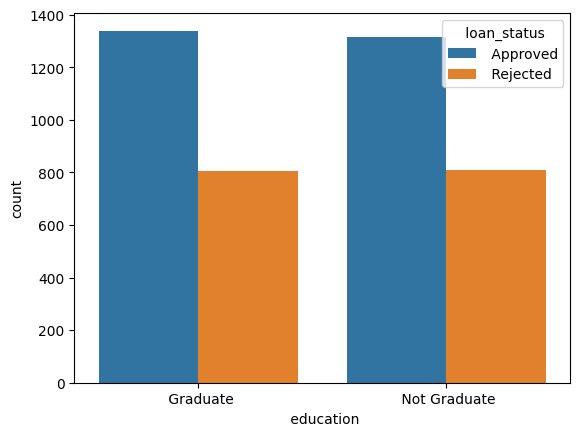

In [130]:
sns.countplot(data=data, x=' education', hue=' loan_status')

plt.show()

Result : Also it can be said with high confidence that the education does not affect the rejection or acceptance of a loan request.

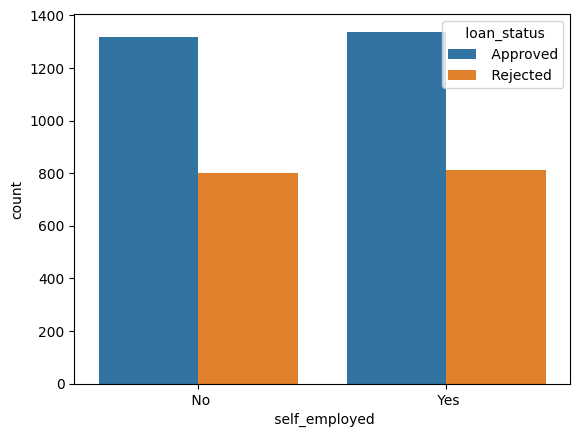

In [131]:
sns.countplot(data=data, x=' self_employed', hue=' loan_status')

plt.show()

Result : It can also be said with confidence that being self-employed or an employer does not affect the rejection or acceptance of a loan application.

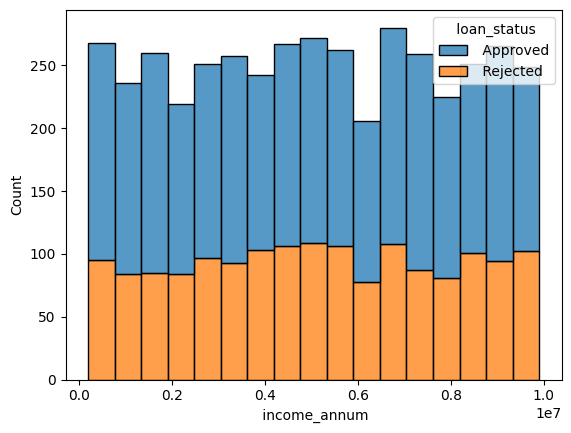

In [132]:
sns.histplot(data, x=' income_annum', hue=' loan_status', multiple='stack')

plt.show()

Result : It can also be said with confidence that the amount of income does not affect the rejection or acceptance of a loan application.

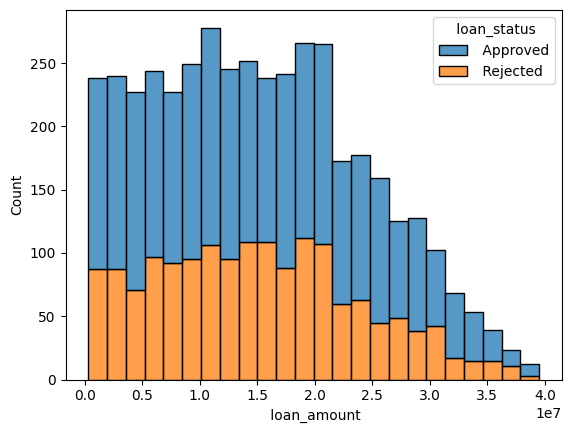

In [133]:
sns.histplot(data, x=' loan_amount', hue=' loan_status', multiple='stack')

plt.show()

Result: It is noteworthy that the number of applications for heavy loans is less. However, according to the number of applications, almost half of the applications for each loan have been rejected.

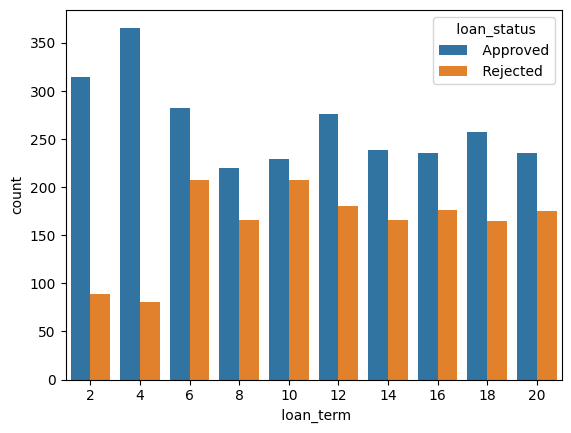

In [134]:
sns.countplot(data, x=' loan_term', hue=' loan_status')

plt.show()

Result : The shorter the loan repayment period, the more likely it is to be accepted.

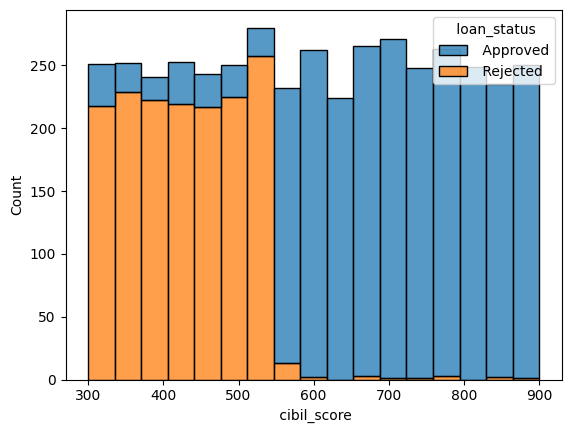

In [135]:
sns.histplot(data, x=' cibil_score', hue=' loan_status', multiple='stack')

plt.show()

Result: An important parameter that banks pay a lot of attention to is the CIBIL Score.
It can be said that for people who have a high CIBIL Score, their requests will be accepted with a high probability.

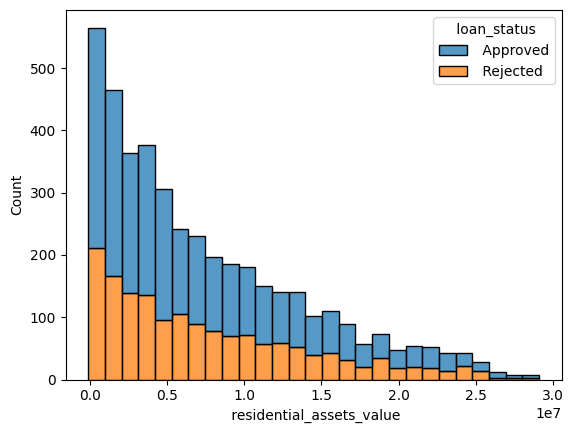

In [136]:
sns.histplot(data, x=' residential_assets_value', hue=' loan_status', multiple='stack')

plt.show()

Result: People who have higher residential asset values, are less likely to apply for a loan. But if they apply, there is a very high probability that their application will be accepted. Because they probably put pledged valuable securities in the bank.

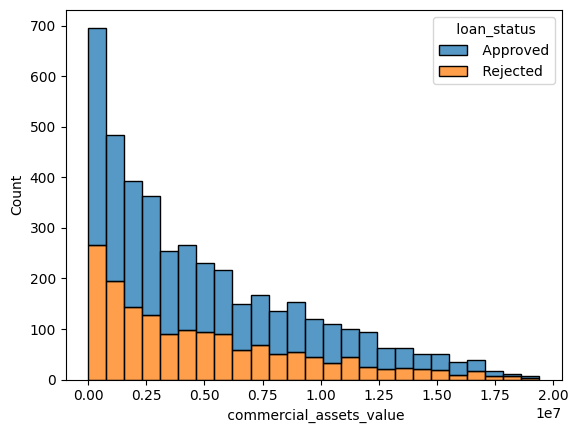

In [137]:
sns.histplot(data, x=' commercial_assets_value', hue=' loan_status', multiple='stack')

plt.show()

Result: People who have higher commercial asset values, are less likely to apply for a loan. But if they apply, there is a very high probability that their application will be accepted. Because they probably put pledged valuable securities in the bank.

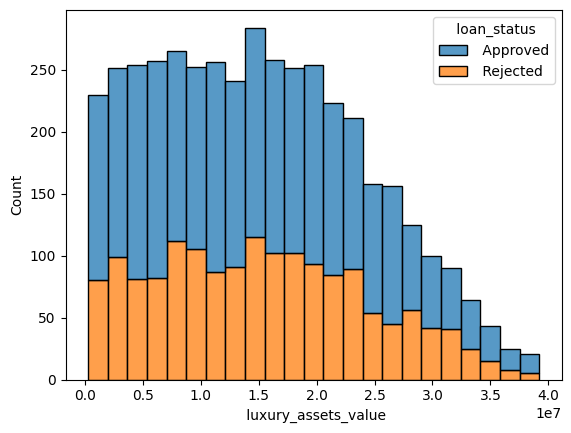

In [138]:
sns.histplot(data, x=' luxury_assets_value', hue=' loan_status', multiple='stack')

plt.show()

Result: People who have higher luxury assets values, are less likely to apply for a loan. But if they apply, there is a very high probability that their application will be accepted. Because they probably put pledged valuable securities in the bank.

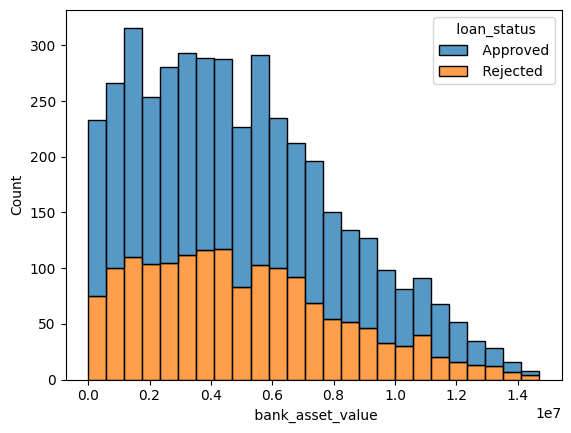

In [139]:
sns.histplot(data, x=' bank_asset_value', hue=' loan_status', multiple='stack')

plt.show()

Result: As it is known, people who have high bank liquidity are less likely to apply for loans. If they do, because of their strong cash backing, the bank is more likely to trust them and approve their loan application.

We have two categorical features, 'education' and 'self_employed'. we have to change them into numerical features using OneHot Encoding.

In [140]:
data = pd.get_dummies(data, columns=[' education', ' self_employed'], dtype=np.int64)

We have to convert 'loan_status' to numerical feature using Label Encoding. Because This is our target value.

In [141]:
le = LabelEncoder()
data[' loan_status'] = le.fit_transform(data[' loan_status'])

Scaling our dataset :

In [142]:
columns = data.columns

robust_scaler = RobustScaler()

robust_scaler.fit(data)

data = pd.DataFrame(robust_scaler.transform(data), columns=columns)

Splitting dataset into Train and Test sets :

In [143]:
X = data.drop([' loan_status'], axis=1)
y = data[' loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

As promised, after data separation, we need to balance the target classes :

In [144]:
smote = SMOTE(sampling_strategy='minority')

X_train, y_train = smote.fit_resample(X_train, y_train)

In the following, we use three machine learning models, "LogisticRegression", "DecisionTree" and "RandomForest".

Finding best hyperparameters for LogisticRegression :

In [145]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'newton-cg'],
    'class_weight': [{0: 0.95, 1: 0.05}, {0: 0.55, 1: 0.45}]
}

grid_logistic = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1')

grid_logistic.fit(X_train, y_train)

print(grid_logistic.best_params_)

{'C': 0.01, 'class_weight': {0: 0.55, 1: 0.45}, 'penalty': 'l2', 'solver': 'liblinear'}


Training LogisticRegression model :

In [146]:
log_classifier = LogisticRegression(C=0.01, class_weight={0 :0.55, 1: 0.45}, penalty='l2', solver='liblinear')

log_classifier.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight={0: 0.55, 1: 0.45}, solver='liblinear')

In [147]:
y_pred_logistic = log_classifier.predict(X_test)

In [148]:
accuracy_score(y_test, y_pred_logistic)

0.9305230288836847

In [149]:
precision_score(y_test, y_pred_logistic)

np.float64(0.8891050583657587)

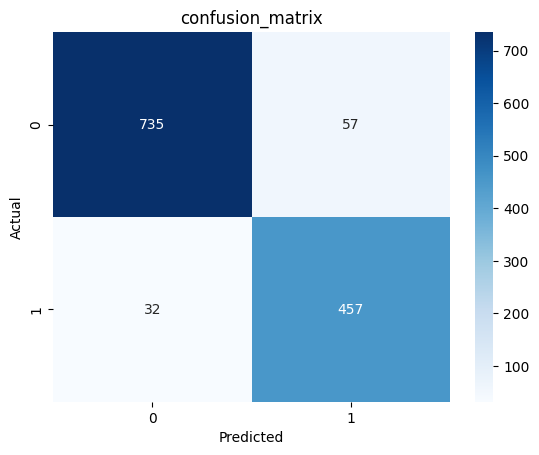

In [150]:
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion_matrix')

plt.show()

Finding best hyperparameters for DecisionTree :

In [151]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4,6,8,10,11,15,20,40,70,120,150],
}

clf_grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='f1')
clf_grid.fit(X_train, y_train)

clf_grid.best_params_

{'criterion': 'entropy', 'max_depth': 70}

Training DecisionTree model :

In [152]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=70)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=70)

In [153]:
y_pred_dt = dt_model.predict(X_test)

In [154]:
accuracy_score(y_test, y_pred_dt)

0.9867291178766588

In [155]:
precision_score(y_test, y_pred_dt)

np.float64(0.9816326530612245)

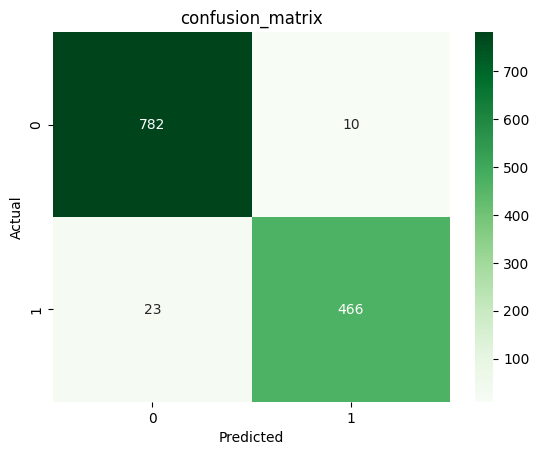

In [77]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap='Greens', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion_matrix')

plt.show()

Finding best hyperparameters for RandomForest model :

In [156]:
param_grid = {
    'n_estimators': [200, 700],
    'max_depth': [4,6,8,10,11,15,20,40,70,120,150],
}

rfc_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1')
rfc_grid.fit(X_train, y_train)

rfc_grid.best_params_

{'max_depth': 70, 'n_estimators': 200}

Training RandomForest model :

In [157]:
rfc_model = RandomForestClassifier(max_depth=150, n_estimators=700)

rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=150, n_estimators=700)

In [158]:
y_pred_rf = rfc_model.predict(X_test)

In [159]:
accuracy_score(y_test, y_pred_rf)

0.9781420765027322

In [160]:
precision_score(y_test, y_pred_rf)

np.float64(0.9852631578947368)

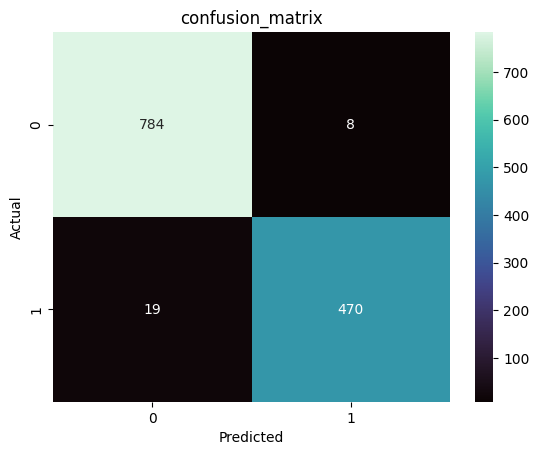

In [78]:
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='mako', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion_matrix')

plt.show()